# A simple Stochastic Gradient Descent algorithm to build a Latent Factor Recommendation system

In [ ]:
import numpy as np
import csv
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Main Cell which computes the P, Q Matrix and updates the weights.

In [2]:
Q = np.array([])
P = np.array([])
learn_rate = 0.01
iterations = 40
r_fact = 0.1
k = 20
error_list = []
#used numpy array to store the P and Q matrix
for i in range(iterations):
    with open("ratings.csv") as file:
        readCSV = csv.reader(file, delimiter = ',')
        for row in readCSV:
#adds the data if the size is zero or else it adds the data that is yet to added
#the data is of random values between 0, square root of 5/k
#size of Q is m X k
#size of P is k X n
            if (Q.size == 0):
                Q = np.random.uniform(low = 0.0, high = np.sqrt(5/k),size = (int(row[0])+1,k))
            elif (len(Q) <= int(row[0])):
                w = int(row[0]) - len(Q)
                z = np.random.uniform(low = 0.0, high = np.sqrt(5/k),size = (w+1,k))
                Q = np.append(Q,z,axis = 0)

            if (P.size == 0):
                P = np.random.uniform(low = 0.0, high = np.sqrt(5/k),size = (int(row[1])+1,k))
            elif (len(P) <= int(row[1])):
                w = int(row[1]) - len(P)
                z = np.random.uniform(low = 0.0, high = np.sqrt(5/k),size = (w+1,k))
                P = np.append(P,z,axis = 0)
                
# updating equations for the stochastic gradient descent
            err = 2*(int(row[2]) - np.dot(Q[int(row[0])], np.transpose(P[int(row[1])])))
            Q[int(row[0])] = Q[int(row[0])] + learn_rate*(err*P[int(row[1])] - 2*r_fact*Q[int(row[0])])
            P[int(row[1])] = P[int(row[1])] + learn_rate*(err*Q[int(row[0])] - 2*r_fact*P[int(row[1])])
            
#calculating the total error
    E = 0
    q = np.sum(np.square(LA.norm(Q, 2, axis = 1)))
    p = np.sum(np.square(LA.norm(P, 2, axis = 1)))
    reg_fact = r_fact*(p+q)
    with open("ratings.csv") as file:
        readCSV = csv.reader(file, delimiter = ',')
        for row in readCSV:
            E += (int(row[2]) - np.dot(Q[int(row[0])], np.transpose(P[int(row[1])])))**2
    total_error = E + reg_fact
    print("Iteration: ",i, "Error: ",total_error)
    error_list.append(total_error)

Iteration:  0 Error:  181098.9574585985
Iteration:  1 Error:  95013.71309177953
Iteration:  2 Error:  89148.03035591358
Iteration:  3 Error:  86263.63042173327
Iteration:  4 Error:  84097.3352232422
Iteration:  5 Error:  82090.2314989645
Iteration:  6 Error:  80037.17784037848
Iteration:  7 Error:  77883.94933118469
Iteration:  8 Error:  75665.67775705838
Iteration:  9 Error:  73454.45216274819
Iteration:  10 Error:  71314.67760346645
Iteration:  11 Error:  69285.64383492054
Iteration:  12 Error:  67385.53566781722
Iteration:  13 Error:  65620.12299867913
Iteration:  14 Error:  63988.45855899869
Iteration:  15 Error:  62485.70983063765
Iteration:  16 Error:  61104.6925892061
Iteration:  17 Error:  59836.91266286963
Iteration:  18 Error:  58673.335758614594
Iteration:  19 Error:  57604.92840206716
Iteration:  20 Error:  56623.00382793029
Iteration:  21 Error:  55719.41990726049
Iteration:  22 Error:  54886.675611426406
Iteration:  23 Error:  54117.94231165007
Iteration:  24 Error:  5340

### Plotting the error graph

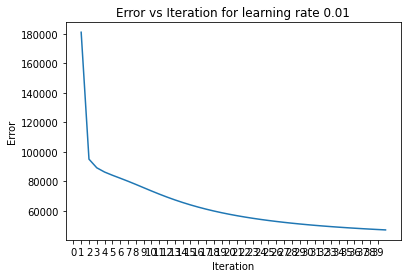

In [3]:
x = [i for i in range(1,41)]
plt.plot(x,error_list)
plt.xticks(np.arange(0, 40, 1))
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration for learning rate 0.01')
plt.rcParams['figure.figsize'] = [12,6]
plt.show()

### Computing the R Matrix (Recommendation Matrix)

In [4]:
R = np.dot(Q, np.transpose(P))

### In ratings.csv 0 user has never rated for movie 1, but we recommend the movie 1 to user 0 because we have predicted that he is more likely to rate that movie a 4 stars.

In [11]:
R[1][0]

4.093347509164396